<a href="https://colab.research.google.com/github/joao-evaristo/Predicao_livros/blob/main/Modelo_predicao_livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predição de preços de livros

Nesse experimento será utilizado dados obtidos de editoras do segmento cristão. Para reunir informações foi utilizado um web scraping feito com a biblioteca Selenium do Python. Por meio dele, todas as informações foram extraidas diretamente dos sites públicos dessas editoras. As editoras selecionadas para compor o dataset foram as seguintes: [Fiel](https://www.editorafiel.com.br/), [Trinitas](https://www.editoratrinitas.com.br/), [Cultura Cristã](https://editoraculturacrista.com.br/), [Hagnos](https://hagnos.com.br/), [Pronobis](https://pronobiseditora.com.br/), [Shedd](https://sheddpublicacoes.com.br/) e [Vida Nova](https://www.vidanova.com.br/).

O trecho a seguir serve para instanciar um dataframe para cada editora por meio do url dos datasets, que estão armazenados no [GitHub](https://github.com/joao-evaristo/Predicao_livros) no formato CSV.

In [215]:
url_fiel = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Fiel.csv'
url_trinitas = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Trinitas.csv'
url_culturacrista = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_CulturaCrista.csv'
url_hagnos = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Hagnos.csv'
url_pronobis = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Pronobis.csv'
url_shedd = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_Shedd.csv'
url_vidanova = 'https://raw.githubusercontent.com/joao-evaristo/Predicao_livros/main/Livros_informacoes_VidaNova.csv'

In [216]:
import pandas as pd
data_fiel = pd.read_csv(url_fiel)
data_fiel.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,"Adoração - Prioridade, Princípios e Prática",John Charles Ryle,Editora Fiel,48,12.00 x 16.50 cm,53.00 g.,Brochura,"Doutrina, Devocional, Vida Cristã",2010.0,17.7
1,Adoração no Lar,Joel Beeke,Editora Fiel,96,12.00 x 16.00 cm,130.00 g.,Brochura,"Familia, Vida Cristã",2012.0,28.8
2,Amado Timóteo,Tom Ascol,Editora Fiel,320,14.00 x 21.00 cm,391.00 g.,Brochura,"Teologia, Ministério",2005.0,81.9
3,Antes de Partir: Encarando a morte com confian...,Nancy Guthrie,Editora Fiel,176,14.00 x 21.00 cm,205.00 g.,Brochura,"Aconselhamento, Vida Cristã",2013.0,51.4
4,O Antigo Evangelho: Um desafio para redescobri...,J. I. PACKER,Editora FIEL,72,12.00 x 16.00 cm,73.00 g.,Brochura,Doutrina,2013.0,35.5


In [217]:
data_trinitas = pd.read_csv(url_trinitas)
data_trinitas.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Livro Os Inklings: O grupo literário de C.S. L...,Igor Gaspar e Gabriele Greggersen,Editora Trinitas,112.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
1,Livro Meios Essenciais de Graça - Paul Washer,Paul Washer,Editora Trinitas,92.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,30
2,Livro Breve Manual de Conservadorismo - Russel...,Russell Kirk,Editora Trinitas,136.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
3,Livro Cultivando um Coração de Virtudes - Vige...,Vigen Guroian,Editora Trinitas,252.0,14cm x 21cm,290 gramas,Brochura,NaN,1ª Edição,50
4,Livro Gratidão - Mary K. Mohler,Mary K. Mohler,Editora Trinitas,144.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,40


In [218]:
data_culturacrista = pd.read_csv(url_culturacrista)
data_culturacrista.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Firmando os Passos (06) - O livro de Deus - Al...,Desconhecido,Cultura Cristã,16,31 × 22 cm,0.120 kg,Envelope,NaN,2009.0,R$6.00
1,Firmando os Passos (06) - O livro de Deus - Al...,Desconhecido,Cultura Cristã,16,31 × 22 cm,0.120 kg,Envelope,NaN,2009.0,R$6.00
2,Firmando os Passos (06) - O livro de Deus - Pr...,Desconhecido,Cultura Cristã,56,21 × 28 cm,0.140 kg,Brochura,NaN,2009.0,R$8.00
3,Firmando os Passos (06) - O livro de Deus - Pr...,Desconhecido,Cultura Cristã,56,21 × 28 cm,0.140 kg,Brochura,NaN,2009.0,R$8.00
4,Firmando os Passos (06) - O livro de Deus – Vi...,Desconhecido,Cultura Cristã,NaN,44 × 31 cm,0.860 kg,NaN,NaN,NaN,R$20.00


In [219]:
data_hagnos = pd.read_csv(url_hagnos)
data_hagnos.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,O amor tem um nome,Adam Weber,Hagnos,288,16x23 Cm,380g,Brochura,NaN,2021.0,"R$ 47,90"
1,Filhos da Promessa - Spurgeon,Charles H. Spurgeon,Hagnos,160,16x23 Cm,340g,Capa Dura,NaN,2021.0,"R$ 39,90"
2,Contos ecológicos,Paulo Debs,United Press,48,18x24 Cm,200g,Brochura,NaN,NaN,"R$ 16,90"
3,"Nova Bíblia Viva – Estudo, leitura e compreens...",NaN,Hagnos,1.552,16x23 Cm,940g,Capa PU + Douração Lateral,NaN,2021.0,"R$ 177,89"
4,"Nova Bíblia Viva – Estudo, leitura e compreens...",NaN,Hagnos,1.552,16x23 Cm,940g,Capa PU + Douração Lateral,NaN,2021.0,"R$ 177,89"


In [220]:
data_pronobis = pd.read_csv(url_pronobis)
data_pronobis.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Teologia do dia a dia – Aquilo em que você acr...,Mary Wiley,Pronobis,223,23 × 16 cm,370 g,Brochura,NaN,2022,"R$72,40"
1,Adoração no Lar,Donald S. Whitney,Pronobis,96,14 × 21 cm,130 g,Brochura,NaN,2022,"R$37,90"
2,Retratos Puritanos,J. I. Packer,Pronobis,262,14 × 21 cm,350 g,Brochura,NaN,2022,"R$56,80"
3,Coração Missionário de Jonathan Edwards,Rennan Dias,Pronobis,144,21 × 14 cm,1130 g,Brochura,NaN,2022,"R$39,90"
4,História dos Batistas: Da Inglaterra para o Mundo,Anthony L. Chute,Pronobis,440,23 × 16 cm,1135 g,Brochura,NaN,2022,"R$189,90"


In [221]:
data_shedd = pd.read_csv(url_shedd)
data_shedd.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,Livro Os Inklings: O grupo literário de C.S. L...,Igor Gaspar e Gabriele Greggersen,Editora Trinitas,112.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
1,Livro Meios Essenciais de Graça - Paul Washer,Paul Washer,Editora Trinitas,92.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,30
2,Livro Breve Manual de Conservadorismo - Russel...,Russell Kirk,Editora Trinitas,136.0,14cm x 21cm,250 gramas,Brochura,NaN,1ª Edição,40
3,Livro Cultivando um Coração de Virtudes - Vige...,Vigen Guroian,Editora Trinitas,252.0,14cm x 21cm,290 gramas,Brochura,NaN,1ª Edição,50
4,Livro Gratidão - Mary K. Mohler,Mary K. Mohler,Editora Trinitas,144.0,14cm x 21cm,150 gramas,Brochura,NaN,1ª Edição,40


In [222]:
data_vidanova = pd.read_csv(url_vidanova)
data_vidanova.head()

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,"Jesus, o filho de Deus",D. A. Carson,Editora VIDA NOVA,128,14 x 21 cm,165,Brochura,NaN,2015.0,37.9
1,"Fim da pobreza, O",Aaron Armstrong,Editora VIDA NOVA,128,14 x 21 cm,159,Brochura,NaN,2015.0,33.9
2,"Deus, casamento e família - 2ª ed. ampliada",Andreas J. Köstenberger e David W. Jones,Editora VIDA NOVA,352,16 x 23 cm,492,Brochura,NaN,2015.0,83.9
3,"Fé na era do ceticismo, A",Timothy Keller,Editora VIDA NOVA,288,16 x 23 cm,438,Brochura,NaN,2015.0,81.9
4,"Eclesiastes e Cantares, introdução e comentário","Michael A. Eaton, G. Lloyd Carr",Editora VIDA NOVA,336,14 x 21 cm,350,Brochura,NaN,1989.0,93.9


Depois que todos os datasets estão em formato de dataframe, é possível reuni-los em um dataframe único que será utilizado como a base de dados principal para o experimento.

In [223]:
frames = [data_fiel, data_trinitas, data_culturacrista, data_hagnos, data_pronobis, data_shedd, data_vidanova]
data = pd.concat(frames)
data

,Título,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,"Adoração - Prioridade, Princípios e Prática",John Charles Ryle,Editora Fiel,48,12.00 x 16.50 cm,53.00 g.,Brochura,"Doutrina, Devocional, Vida Cristã",2010.0,17.7
1,Adoração no Lar,Joel Beeke,Editora Fiel,96,12.00 x 16.00 cm,130.00 g.,Brochura,"Familia, Vida Cristã",2012.0,28.8
2,Amado Timóteo,Tom Ascol,Editora Fiel,320,14.00 x 21.00 cm,391.00 g.,Brochura,"Teologia, Ministério",2005.0,81.9
3,Antes de Partir: Encarando a morte com confian...,Nancy Guthrie,Editora Fiel,176,14.00 x 21.00 cm,205.00 g.,Brochura,"Aconselhamento, Vida Cristã",2013.0,51.4
4,O Antigo Evangelho: Um desafio para redescobri...,J. I. PACKER,Editora FIEL,72,12.00 x 16.00 cm,73.00 g.,Brochura,Doutrina,2013.0,35.5
...,...,...,...,...,...,...,...,...,...,...
697,Conselhos para obreiros,C. H. Spurgeon,Editora VIDA NOVA,160,14 x 21 cm,205,Brochura,NaN,2015.0,39.9
698,Romanos - Série comentário expositivo,C. Marvin Pate,Editora VIDA NOVA,368,17 x 23 cm,581,Brochura,NaN,2015.0,95.9
699,Gálatas para você,Timothy Keller,Editora VIDA NOVA,208,14 x 21 cm,249,Brochura,NaN,2015.0,54.9
700,"Efésios, introdução e comentário",Francis Foulkes,Editora VIDA NOVA,152,14 x 21 cm,166,Brochura,NaN,1983.0,45.9


Agora, é possível visualizar a participação de cada editora no dataframe.

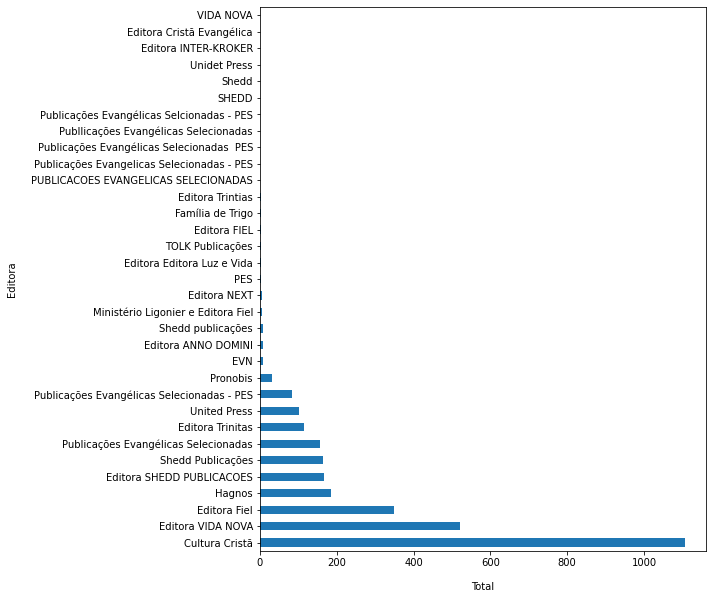

In [224]:
import matplotlib.pyplot as plt
data['Editora'].value_counts().plot(kind='barh', figsize=(8, 10))
plt.xlabel("Total", labelpad=14)
plt.ylabel("Editora", labelpad=14)

plt.show()

Como é possível constatar, há livros em que, seja por grafia ou por abreviação, a editora é a mesma que de outras amostras, porém foram indicados como de editoras distintas. Para isso, é necessário fazer um tratamento que coloque os livros de mesma editora juntos. Exemplo, livros da editora 'Editora FIEL' também fazem parte da editora 'Editora Fiel'.

In [225]:
rows = data['Editora'].str.contains("VIDA NOVA", na=False)
data.loc[rows, 'Editora'] = 'Editora VIDA NOVA'
rows = data['Editora'].str.contains("PES|Selecionadas|Selcionadas", na=False, case=False)
data.loc[rows, 'Editora'] = 'PES'
rows = data['Editora'].str.contains("SHEDD", na=False, case=False)
data.loc[rows, 'Editora'] = 'Editora Shedd'
rows = data['Editora'].str.contains("Editora Fiel", na=False, case=False)
data.loc[rows, 'Editora'] = 'Editora Fiel'
rows = data['Editora'].str.contains("Trintias", na=False)
data.loc[rows, 'Editora'] = 'Editora Trinitas'
rows = data['Editora'].str.contains("Unidet", na=False)
data.loc[rows, 'Editora'] = 'United Press'

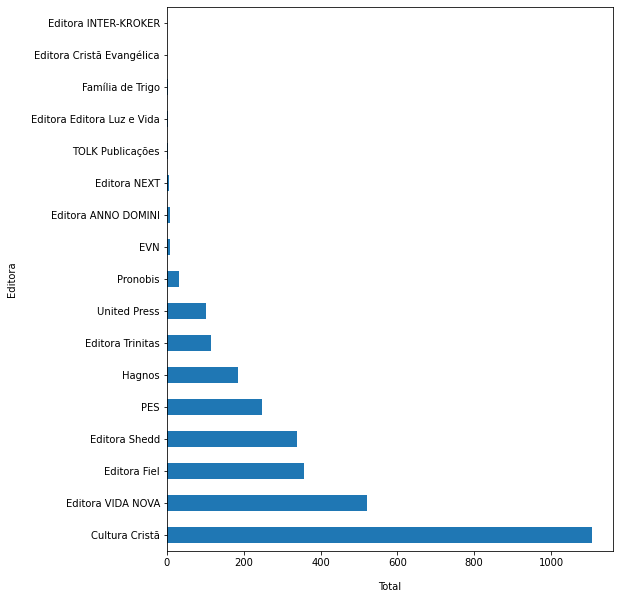

In [226]:
data['Editora'].value_counts().plot(kind='barh', figsize=(8, 10))
plt.xlabel("Total", labelpad=14)
plt.ylabel("Editora", labelpad=14)

plt.show()

Após a aglutinação das editoras, é importante verificar e tratar, caso existam, os dados que estão com valor nulo.

In [227]:
print(data.isnull().sum())  # descobre-se quais colunas possuem dados faltantes

Título           1
Autor           54
Editora         17
Páginas        256
Formato        468
Peso            25
Acabamento      30
Categoria     2258
Edição         643
Preço            2
dtype: int64


Aqui, as linhas que possuem valores nulos nas colunas Autor, Categoria, Formato e Acabamento serão preenchidas com valores padrão ou como "Desconhecido(a)". A seguir, as amostras que ainda possuem dados nulos são excluidas do dataset e o restante passa por um tratamento necessário para prosseguir com o pipeline. 

In [228]:
data['Autor'].fillna(value='Desconhecido', inplace=True)
data['Categoria'].fillna(value='Desconhecida', inplace=True)
data['Formato'].fillna(value='14 x 21cm', inplace=True)
data['Acabamento'].fillna(value='Brochura', inplace=True)

In [229]:
data = data.copy()
data = data.dropna()
data.drop("Título", axis=1, inplace=True)
data = data[data["Editora"].str.contains("Família de Trigo") == False]
data = data.apply(lambda x: x.astype(str).str.upper())
data = data.assign(Páginas = lambda x: x['Páginas'].astype(str).str.extract('(\d+)'))
data = data.assign(Peso = lambda x: x['Peso'].astype(str).str.extract('(\d+)'))
rows = data['Edição'].str.contains("EDIÇÃO")
data.loc [rows, 'Edição'] = '2020.0'
data['Preço'] = data['Preço'].apply(lambda x: str(x).replace('R$', '').replace(' ', ''))
data['Preço'] = data['Preço'].apply(lambda x: str(x).replace('.', '') if len(str(x))>=8 else x)
data['Preço'] = data['Preço'].apply(lambda x: str(x).replace(',', '.'))
data['Formato'] = data['Formato'].apply(lambda x: eval(str(x).replace('X', '*').replace('×', '*').replace('CM', '').replace(',', '.').rstrip('.')))
data

,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,JOHN CHARLES RYLE,EDITORA FIEL,48,198.0,53,BROCHURA,"DOUTRINA, DEVOCIONAL, VIDA CRISTÃ",2010.0,17.7
1,JOEL BEEKE,EDITORA FIEL,96,192.0,130,BROCHURA,"FAMILIA, VIDA CRISTÃ",2012.0,28.8
2,TOM ASCOL,EDITORA FIEL,320,294.0,391,BROCHURA,"TEOLOGIA, MINISTÉRIO",2005.0,81.9
3,NANCY GUTHRIE,EDITORA FIEL,176,294.0,205,BROCHURA,"ACONSELHAMENTO, VIDA CRISTÃ",2013.0,51.4
4,J. I. PACKER,EDITORA FIEL,72,192.0,73,BROCHURA,DOUTRINA,2013.0,35.5
...,...,...,...,...,...,...,...,...,...
697,C. H. SPURGEON,EDITORA VIDA NOVA,160,294.0,205,BROCHURA,DESCONHECIDA,2015.0,39.9
698,C. MARVIN PATE,EDITORA VIDA NOVA,368,391.0,581,BROCHURA,DESCONHECIDA,2015.0,95.9
699,TIMOTHY KELLER,EDITORA VIDA NOVA,208,294.0,249,BROCHURA,DESCONHECIDA,2015.0,54.9
700,FRANCIS FOULKES,EDITORA VIDA NOVA,152,294.0,166,BROCHURA,DESCONHECIDA,1983.0,45.9


Com o tratamento dos nulos, pode-se verificar quais editoras farão parte do dataset final.

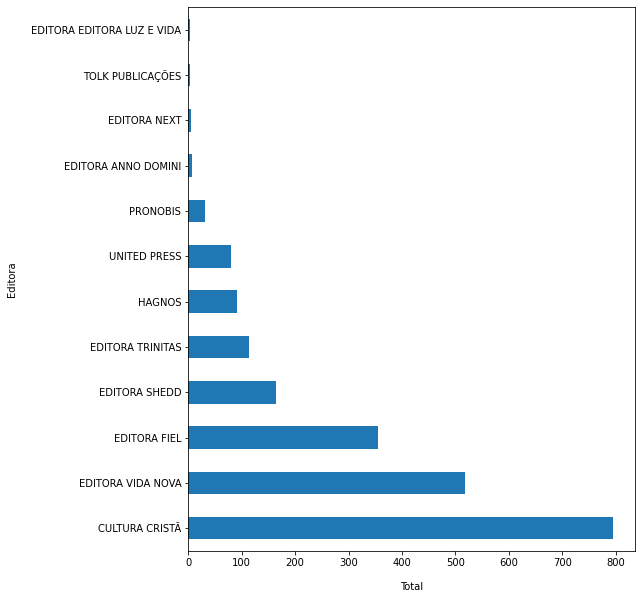

In [230]:
data['Editora'].value_counts().plot(kind='barh', figsize=(8, 10))
plt.xlabel("Total", labelpad=14)
plt.ylabel("Editora", labelpad=14)

plt.show()

Como os dados de Categoria, Acabamento, Editora e Autor possuem dados no formato string, é necessário transformá-los em um formato que os modelos do sklearn consigam utilizar. Para isso, cada um desses campos tem os seus valores transformados em números.

In [231]:
from sklearn.preprocessing import LabelEncoder

le_category = LabelEncoder()
le_finishing = LabelEncoder()
le_publishing = LabelEncoder()
le_author = LabelEncoder()
data["Categoria"] = le_category.fit_transform(data['Categoria'])
data["Acabamento"]  = le_finishing.fit_transform(data['Acabamento'])
data["Editora"] = le_publishing.fit_transform(data['Editora'])
data["Autor"] = le_author.fit_transform(data['Autor'])
data = data.astype(float)
data = data[data['Peso'] > 10]
data

,Autor,Editora,Páginas,Formato,Peso,Acabamento,Categoria,Edição,Preço
0,326.0,3.0,48.0,198.0,53.0,2.0,40.0,2010.0,17.7
1,318.0,3.0,96.0,192.0,130.0,2.0,54.0,2012.0,28.8
2,611.0,3.0,320.0,294.0,391.0,2.0,126.0,2005.0,81.9
3,466.0,3.0,176.0,294.0,205.0,2.0,5.0,2013.0,51.4
4,274.0,3.0,72.0,192.0,73.0,2.0,35.0,2013.0,35.5
...,...,...,...,...,...,...,...,...,...
697,70.0,7.0,160.0,294.0,205.0,2.0,29.0,2015.0,39.9
698,72.0,7.0,368.0,391.0,581.0,2.0,29.0,2015.0,95.9
699,604.0,7.0,208.0,294.0,249.0,2.0,29.0,2015.0,54.9
700,204.0,7.0,152.0,294.0,166.0,2.0,29.0,1983.0,45.9


Separação dos parâmetros X e Y que serão utilizados nos modelos.

Para ter uma noção da relação entre as features e o preço, o qual é o alvo nesse experimento, utilizare-mos um heatmap das correlações das features. Nele, quanto mais próximo de 1 ou -1, maior a relação, tanto positiva quanto negativa entre as features.

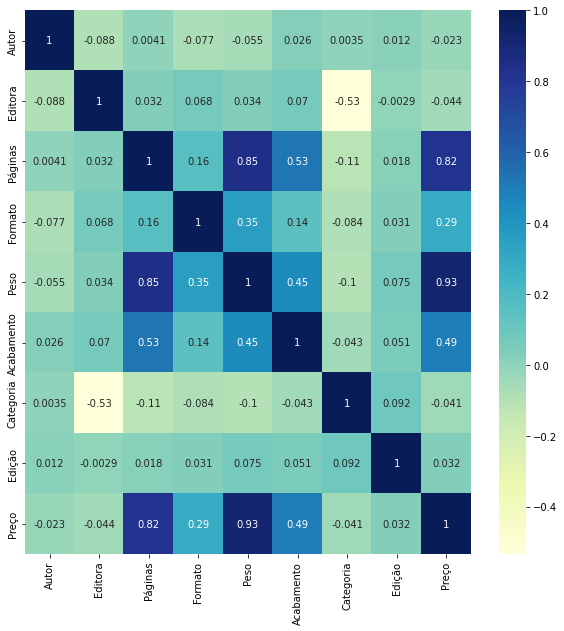

In [232]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


Para a visualização, caso existam, dos outliers, utilizare-mos boxplots, que permitem ter a ideia dos intervalos dos dados de cada feature.

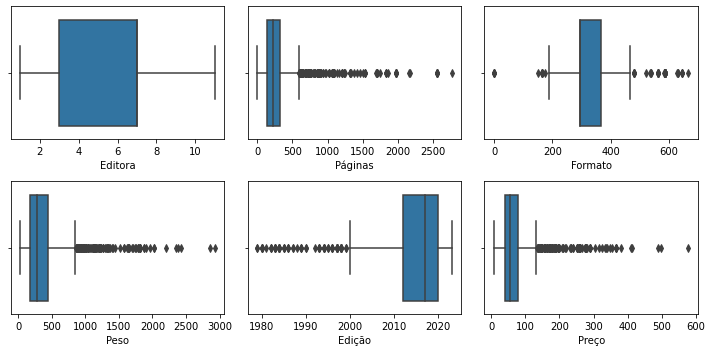

In [233]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
plt1 = sns.boxplot(x=data['Editora'], ax=axs[0, 0])
plt2 = sns.boxplot(x=data['Páginas'], ax=axs[0, 1])
plt3 = sns.boxplot(x=data['Formato'], ax=axs[0, 2])
plt4 = sns.boxplot(x=data['Peso'], ax=axs[1, 0])
plt5 = sns.boxplot(x=data['Edição'], ax=axs[1, 1])
plt6 = sns.boxplot(x=data['Preço'], ax=axs[1, 2])
plt.tight_layout()
plt.show()

É possível notar a presença de outliers em Páginas, Formato, Peso, Edição e Preço. Portanto, vamos remover os outliers dessas colunas utilizando a estratégia dos quartis.

In [234]:
cols = ['Páginas', 'Formato', 'Peso', 'Preço', 'Edição']
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

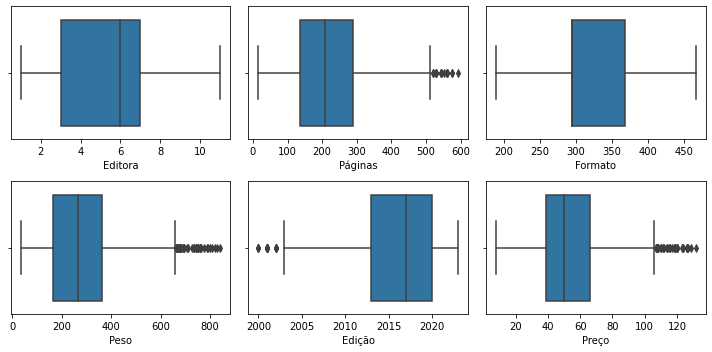

In [235]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
plt1 = sns.boxplot(x=data['Editora'], ax=axs[0, 0])
plt2 = sns.boxplot(x=data['Páginas'], ax=axs[0, 1])
plt3 = sns.boxplot(x=data['Formato'], ax=axs[0, 2])
plt4 = sns.boxplot(x=data['Peso'], ax=axs[1, 0])
plt5 = sns.boxplot(x=data['Edição'], ax=axs[1, 1])
plt6 = sns.boxplot(x=data['Preço'], ax=axs[1, 2])
plt.tight_layout()
plt.show()

Agora é possível observar que agora as distribuições dos dados estão mais uniformes. Assim, o modelo não será influenciado por esses dados que fogem muito da média.

O plot adiante permite visualizar como está a relação entre cada feature e o preço e se possuem uma relação de linearidade, sigmoide, parabólica, entre outras.

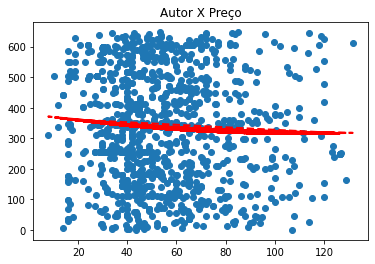

In [236]:
import numpy as np
x_, y_ = data.Preço, data.Autor
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Autor X Preço")
plt.show()

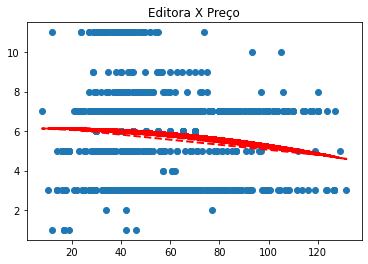

In [237]:
y_ = data.Editora
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Editora X Preço")
plt.show()

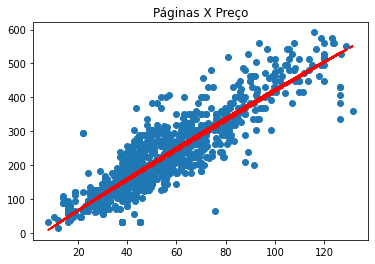

In [238]:
y_ = data.Páginas
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Páginas X Preço")
plt.show()

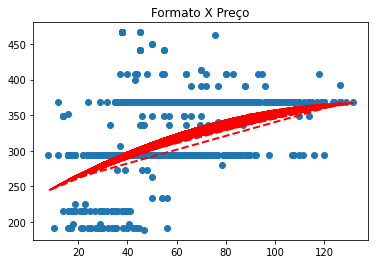

In [239]:
y_ = data.Formato
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Formato X Preço")
plt.show()

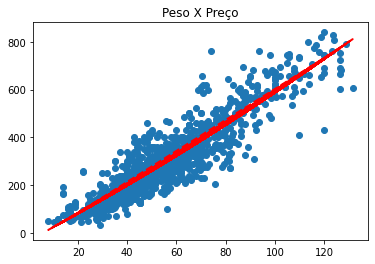

In [240]:
y_ = data.Peso
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Peso X Preço")
plt.show()

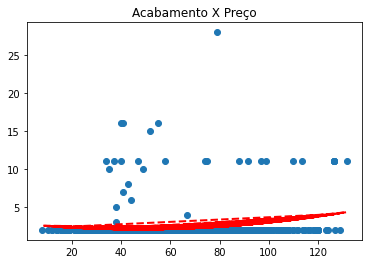

In [241]:
y_ = data.Acabamento
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Acabamento X Preço")
plt.show()

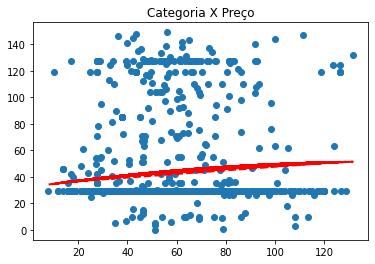

In [242]:
y_ = data.Categoria
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Categoria X Preço")
plt.show()

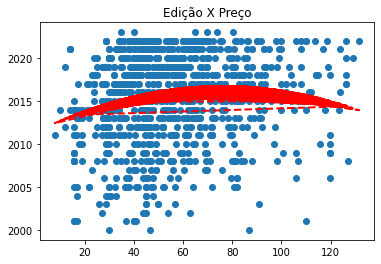

In [243]:
y_ = data.Edição
theta = np.polyfit(x_, y_, 2)
y_line = theta[2] + theta[1] * pow(x_, 1) + theta[0] * pow(x_, 2)
plt.scatter(x_, y_)
plt.plot(x_, y_line, color='red', linestyle='--', linewidth=2)
plt.title("Edição X Preço")
plt.show()

Como é possível observar pro meio dos gráficos, há uma relação mais considerável entre o preço e as features Peso, Páginas e Formato. Para sustentar essa conclusão, pode-se usar, novamente, o heatmap das features, dessa vez, com a remoção dos outliers.

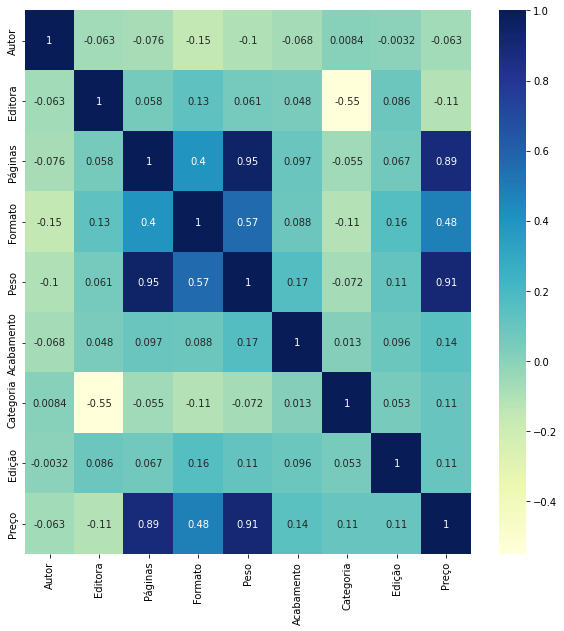

In [244]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Nessa etapa, será feita a parte prática dos modelos regressivos. Primeiro, é necessário separar as variáveis de entrada, X; e as variáveis de saída, Y. Nesse caso, Y se refere aos preços dos livros; e X, as demais features.

In [245]:
X=data.drop('Preço',axis=1)
y=data['Preço']

Em segundo lugar, separa-se os conjuntos de teste e treino. Para esse experimento, 70% dos dados foram utilizados para treino e 30% para teste. Para os experimentos fossem feitos sempre com o mesmo conjunto de treino e teste, é necessário atribuir o valor 42 ao parâmetro random_state.

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)# Separando teste e treino
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Com tudo preparado, é hora de treinar os modelos e testá-los. Para isso, os modelos selecionados foram: Linear Regression, KNeighbors Regressor, Gradient Boosting Regressor, Elastic Net, SVR, Random Forest Regressor, Bayesian Ridge, Lasso e Ridge. Para mensurar o desempenho dos modelos foi utilizado a função r2_score e a mean_squared_error. A primeira função é avaliada com um retorno positivo quanto mais próxima de 1 se aproximar o seu valor, variando de 0 a 1. A segunda também é ótima quanto mais próxima de 1 estiver, porém, essa pode variar de infinito a 0. É importante usar a função de Mean squared error, nesse caso, pois fornece uma noção de qual é a perda, na média, que estamos tendo na precificação dos modelos. Por ser uma função quadrática, é necessário tirar a raiz do valor para ter o erro.

In [247]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,60.013284
1,40.0,31.785574
2,46.0,53.059441
3,15.9,26.036790
4,53.9,56.893341


In [248]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('LinearRegression')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

LinearRegression
Score: 0.8700795258210056
MSE: 77.79359786453536


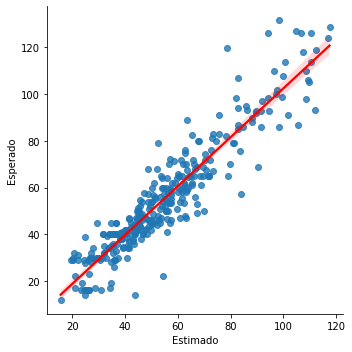

In [249]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [250]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.969412
1,40.0,40.000000
2,46.0,49.955685
3,15.9,17.454982
4,53.9,59.329130


In [251]:
print('KNN')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

KNN
Score: 0.8721304093975883
MSE: 76.5655726958167


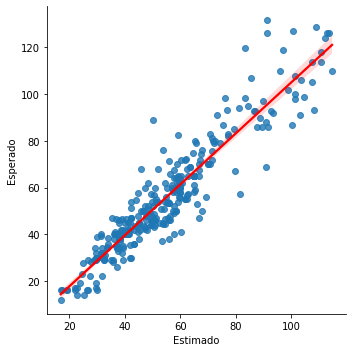

In [252]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [253]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.2, random_state=42, n_estimators=450)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,56.884115
1,40.0,38.741425
2,46.0,51.777437
3,15.9,20.958729
4,53.9,54.873737


In [254]:
print('Gradient Boosting Regressor')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Gradient Boosting Regressor
Score: 0.9232105417769586
MSE: 45.979883240024755


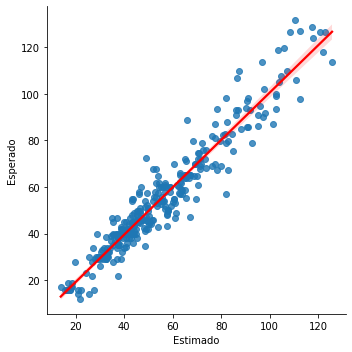

In [255]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [256]:
from sklearn.linear_model import ElasticNet
elasnet = ElasticNet()
elasnet.fit(X_train, y_train)
y_pred = elasnet.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.533405
1,40.0,31.464039
2,46.0,52.343796
3,15.9,25.708801
4,53.9,56.778318


In [257]:
print('ElasticNet')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

ElasticNet
Score: 0.8738232899403079
MSE: 75.55191207761746


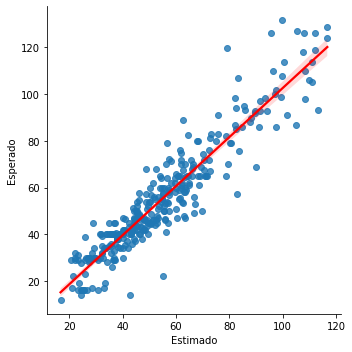

In [258]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [259]:
from sklearn.svm import SVR
svr=SVR(kernel='poly', degree=9, coef0=0.8)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,56.841091
1,40.0,31.947932
2,46.0,49.213226
3,15.9,23.593880
4,53.9,58.127654


In [260]:
print('SVR')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

SVR
Score: 0.8773904841424408
MSE: 73.41595257609113


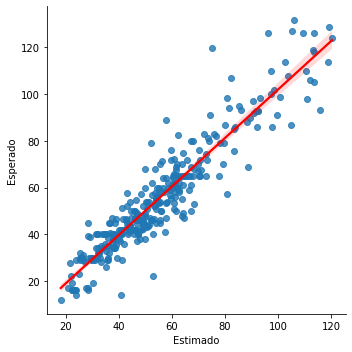

In [261]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [262]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,58.123333
1,40.0,36.818000
2,46.0,55.688467
3,15.9,16.531667
4,53.9,58.428000


In [263]:
print('RandomForestRegressor')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

RandomForestRegressor
Score: 0.8927581563028293
MSE: 64.21411956467372


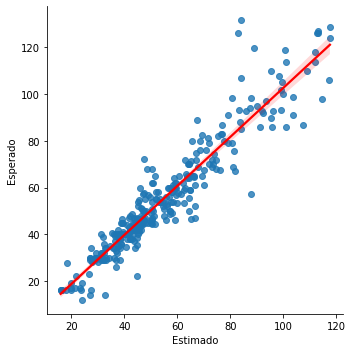

In [264]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [265]:
from sklearn.linear_model import BayesianRidge

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
y_pred = bayesian.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.743106
1,40.0,31.696216
2,46.0,52.631897
3,15.9,25.818667
4,53.9,56.934812


In [266]:
print('BayesianRidge')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

BayesianRidge
Score: 0.8713722563448453
MSE: 77.01953850896183


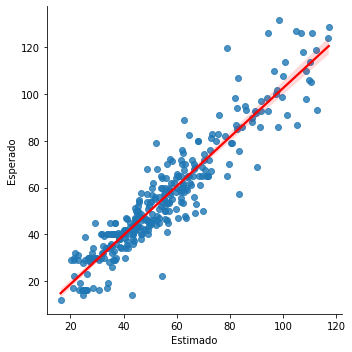

In [267]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [268]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,59.492286
1,40.0,31.442043
2,46.0,52.310801
3,15.9,25.737625
4,53.9,56.731068


In [269]:
print('Lasso')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Lasso
Score: 0.8737279469734959
MSE: 75.60900140450191


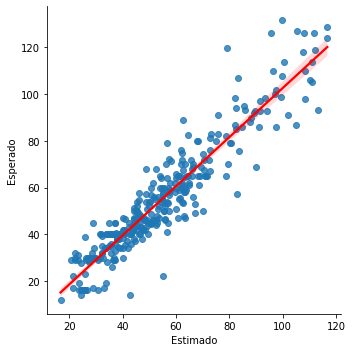

In [270]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

In [271]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

_preds_df = pd.DataFrame(dict(Esperado=y_test, Estimado=y_pred))
_preds_df.head()

,Esperado,Estimado
0,57.9,60.013203
1,40.0,31.785547
2,46.0,53.059312
3,15.9,26.036724
4,53.9,56.893354


In [272]:
print('Ridge')
print('Score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

Ridge
Score: 0.8700799579089014
MSE: 77.7933391395559


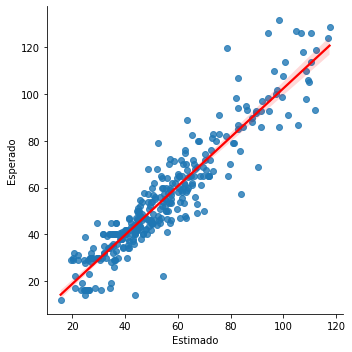

In [273]:
sns.lmplot(x="Estimado", y="Esperado", data=_preds_df, line_kws={'color': 'red'});
plt.show()

Por esses testes, é possível concluir que o melhor modelo foi o Gradient Boosting Regressor, pois obteve o maior valor de R2 e o menor Mean squared error, apresentando um valor aproximado de 46, significando uma perda média de R$ 6,78; o que é um valor justo para esse problema.

Por fim, pode-se utilizar os resultados obtidos até então para predizer novos valores de entrada que não estão no dataset.

In [274]:
import re

author = input('Autor: ')
publishing = input('Editora: ')
pages = input('Páginas: ')
format = input('Formato (largura x altura em centimetros): ')
weight = input('Peso (em gramas): ')
finishing = input('Acabamento: ')
category = input('Categoria: ')
edition = input('Edição (ano): ')

dict_book = {'Autor': author,
             'Editora': publishing,
             'Páginas': pages,
             'Formato': format,
             'Peso': weight,
             'Acabamento': finishing,
             'Categoria': category,
             'Edição': edition}

for k,v in dict_book.items():
  if isinstance(v, str):
    dict_book.update({k: v.upper()})

book_serie = pd.Series(dict_book)
print(book_serie)

Autor: Jen Oshman
Editora: Editora Fiel
Páginas: 240 páginas
Formato (largura x altura em centimetros): 14 x 21cm
Peso (em gramas): 275 g.
Acabamento: Brochura
Categoria: Mulheres, Cosmovisão
Edição (ano): 2023
Autor                   JEN OSHMAN
Editora               EDITORA FIEL
Páginas                240 PÁGINAS
Formato                  14 X 21CM
Peso                        275 G.
Acabamento                BROCHURA
Categoria     MULHERES, COSMOVISÃO
Edição                        2023
dtype: object


Com as entradas transformadas em uma Series do pandas, podemos passar os dados de entradas por um pipeline semelhante ao usado para o dataframe, tendo como objeto preparar a entrada para poder ser prevista pelo modelo treinado. Utiliza-se os mesmos label encoders anteriores e, caso os dados de entrada não constem no encoder, é atribuido um valor padrão.

In [275]:
le_dict_author = dict(zip(le_author.classes_, le_author.transform(le_author.classes_)))
le_dict_finishing = dict(zip(le_finishing.classes_, le_finishing.transform(le_finishing.classes_)))
le_dict_category = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
le_dict_publishing = dict(zip(le_publishing.classes_, le_publishing.transform(le_publishing.classes_)))


new_author = le_dict_author.get(book_serie['Autor'], '<Unknown>')
new_category = le_dict_category.get(book_serie['Categoria'], '<Unknown>')
new_publishing = le_dict_publishing.get(book_serie['Editora'], '<Unknown>')
new_finishing = le_dict_finishing.get(book_serie['Acabamento'], '<Unknown>')

if new_author == '<Unknown>':
  new_author = le_dict_author.get('DESCONHECIDO')

if new_category == '<Unknown>':
  new_category = le_dict_category.get('DESCONHECIDA')

if new_publishing == '<Unknown>':
  new_publishing = le_dict_publishing.get('EDITORA FIEL')

if new_finishing == '<Unknown>':
  new_finishing = le_dict_finishing.get('BROCHURA')


book_serie['Autor'] = new_author
book_serie['Categoria'] = new_category
book_serie['Editora'] = new_publishing
book_serie['Acabamento'] = new_finishing
book_serie['Páginas'] = re.findall(r'\d+', book_serie['Páginas'])[0]
book_serie['Peso'] = re.findall(r'\d+', book_serie['Peso'])[0]
book_serie['Formato'] = eval(str(book_serie['Formato']).replace('X', '*').replace('CM', ''))
book_serie = book_serie.astype(float)

print(book_serie)

Autor          303.0
Editora          3.0
Páginas        240.0
Formato        294.0
Peso           275.0
Acabamento       2.0
Categoria       29.0
Edição        2023.0
dtype: float64


In [276]:
price_predict = gbr.predict(book_serie.values.reshape(1, -1))[0]
print(f'Preço previsto para o livro de entrada = {price_predict}')

Preço previsto para o livro de entrada = 58.81647105950792
